In [2]:
from google.colab import files
files.upload()

Saving Mini-Project-Sem6---2019.zip to Mini-Project-Sem6---2019 (2).zip


{'Mini-Project-Sem6---2019.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x98\x8a2K\xb6\xfd3ZL\x8a\x00\x00\xdd\xc4\x02\x00\x10\x00\x00\x00problem_data.csv\xa4]\xdb\x92\xdc6\x92}\xdf\xafP\xe8q\xa3\xbc\x81\xbc\xe0\xf6(\xdb\xb2gvf\xbea\xa2\xa5.Y\x1d\xab\x96j\xbbJ\x9e\xf1\xdf/@\x16\x89\x03\x12\x04\xd9\xde\xa7\x99\xb2\xaaH \x91\xc8<y\xf2\xd2\x97\x97o\x1f\xbe\x9c\x9f\xff\xf9\xf4x\xfar\xfe\xfd\xfc\xe5\x9f\xb7?.\xe7\xd3\xe5\xdb\xd3\xd7\xdb\xf5t{\xf8\xed\xfa\x1f\xf9\x1b\xff\x14\xa7\xf1\xf4\x97\xd3i\xfc\xe4(\xd2\xe9\xdd\xf4\x89\r\x9b\xd3/\xd3\'!I\xffd\x8d\xf9/sz\xfb\xdb\xcb\xf9\xfc\xf8\xc7\xe9\xe9\xf9\x92\xdeq\xfez{\xb8=}\xfb\xfav\xfc"\x19*_\xfc\xf8\xed\xeb\xf5\xf6\xf2\xfd\xe3\xed\xe9\xf7\xf3\x9b\x87/\xbf}{y\xba}~\xbe\x9e\xee\x0fx~\xb8}\x9e~\xa6>\x9e\xde\xcf\xef\x8ejN?\xce\xef66\xa6O6=\xf1\xc3\xcb\xf7\xdb\xf9\xcd\xa7o/\x1f\xcf\xf7\xdfE\x1bN?\x97\x1dX=\xfd4}R\xe3\xf2\xef\xc8\x8c\x8by\xfct}\xf3\xf0\xf5\xf1\xcd\xf5\xe9\xf9\xe9\xcb\xc3\xcb\xe9\xf1\xfa=-\xe4\xe1\xf2\xf9z_\x83Fv\xf3\xda\xeb\xcd\xdd\x17\x9

In [3]:
!unzip Mini-Project-Sem6---2019.zip

Archive:  Mini-Project-Sem6---2019.zip
replace problem_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: problem_data.csv        
  inflating: sample_submissions_wbscxqU.csv  
  inflating: test_submissions_NeDLEvX.csv  
  inflating: train_submissions.csv   
  inflating: user_data.csv           


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [0]:
problems_df = pd.read_csv('problem_data.csv')
users_df = pd.read_csv('user_data.csv')
train_df = pd.read_csv('train_submissions.csv')
test_df = pd.read_csv('test_submissions_NeDLEvX.csv')


In [6]:
print("Training data count: ",len(train_df))
print("No. of null values: ", train_df.isnull().sum())

Training data count:  155295
No. of null values:  user_id           0
problem_id        0
attempts_range    0
dtype: int64


In [7]:
print("Testing data count: ",len(test_df))
print("No. of null values: ", test_df.isnull().sum())

Testing data count:  66555
No. of null values:  ID            0
user_id       0
problem_id    0
dtype: int64


In [8]:
print("No. of problems: ",len(problems_df))
print("No. of null values: ",problems_df.isnull().sum())

No. of problems:  6544
No. of null values:  problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64


In [9]:
print("No. of users: ",len(users_df))
print("No. of null values: ",users_df.isnull().sum())

No. of users:  3571
No. of null values:  user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64


In [10]:
print("PROBLEMS_DATA.CSV\n",problems_df.head(),"\n")
print("USERS_DATA.CSV\n",users_df.head(),"\n")
print("TRAIN_SUBMISSIONS.CSV\n",train_df.head(),"\n")
print("TEST_SUBMISSIONS_NEDLEVX.CSV\n",test_df.head(),"\n")

PROBLEMS_DATA.CSV
   problem_id level_type  points                                 tags
0  prob_3649          H     NaN                                  NaN
1  prob_6191          A     NaN                                  NaN
2  prob_2020          F     NaN                                  NaN
3   prob_313          A   500.0                greedy,implementation
4   prob_101          A   500.0  constructive algorithms,greedy,math 

USERS_DATA.CSV
      user_id  submission_count  problem_solved  contribution  country  \
0  user_3311                47              40             0      NaN   
1  user_3028                63              52             0    India   
2  user_2268               226             203            -8    Egypt   
3   user_480               611             490             1  Ukraine   
4   user_650               504             479            12   Russia   

   follower_count  last_online_time_seconds  max_rating   rating  \
0               4                150411164

#Merging the data

In [0]:
df = pd.merge(train_df,problems_df,on='problem_id',how='left')
X = pd.merge(df,users_df,on='user_id',how='left')

In [12]:
#Trianing data
print("Training data: ",len(X))
users = X['user_id'].unique()
print("Users: ",len(users))
problems = X['problem_id'].unique()
print("Problems: ",len(problems))


Training data:  155295
Users:  3529
Problems:  5776


In [13]:
X.head()

user_id problem_id  attempts_range level_type  points  \
0   user_232  prob_6507               1          B  1000.0   
1  user_3568  prob_2994               3          C  1500.0   
2  user_1600  prob_5071               1          A   500.0   
3  user_2256   prob_703               1          A   500.0   
4  user_2321   prob_356               1          D  2000.0   

                         tags  submission_count  problem_solved  contribution  \
0                     strings                53              47             0   
1              brute force,dp               133             118             0   
2              implementation                50              44             0   
3  brute force,implementation               271             233            23   
4       dfs and similar,trees               155             135             0   

      country  follower_count  last_online_time_seconds  max_rating   rating  \
0  Bangladesh               1                1503633778     307.913  206.709   
1         NaN               0                1502200122     324.255  235.378   
2         NaN               7                1504719542     343.177  229.358   
3   Indonesia              40                1505175115     436.927  399.083   
4       India              80                1505421849     492.546  472.190   

           rank  registration_time_seconds  
0      beginner                 1432110935  
1      beginner                 1454664414  
2      beginner                 1473490873  
3  intermediate                 1447736644  
4      advanced                 1437724657

In [14]:
train_df.head()

user_id problem_id  attempts_range
0   user_232  prob_6507               1
1  user_3568  prob_2994               3
2  user_1600  prob_5071               1
3  user_2256   prob_703               1
4  user_2321   prob_356               1

In [15]:
factor = pd.factorize(X['level_type'],sort=True)
X['level_type'] = factor[0]

#factor = pd.factorize(X['rank'],sort=)
#X['rank'] = factor[0]
type_level = {'beginner': 0,'intermediate':1,'advanced': 2,'expert':3}
X['rank'] = [type_level[type] for type in X['rank']]

X['user_id'] = X['user_id'].str.replace('user_','')
X['problem_id'] = X['problem_id'].str.replace('prob_','')

X['user_id'] = X['user_id'].astype('int64',copy = False)
X['problem_id'] = X['problem_id'].astype('int64',copy = False)

X.head()


user_id  problem_id  attempts_range  level_type  points  \
0      232        6507               1           1  1000.0   
1     3568        2994               3           2  1500.0   
2     1600        5071               1           0   500.0   
3     2256         703               1           0   500.0   
4     2321         356               1           3  2000.0   

                         tags  submission_count  problem_solved  contribution  \
0                     strings                53              47             0   
1              brute force,dp               133             118             0   
2              implementation                50              44             0   
3  brute force,implementation               271             233            23   
4       dfs and similar,trees               155             135             0   

      country  follower_count  last_online_time_seconds  max_rating   rating  \
0  Bangladesh               1                1503633778     307.913  206.709   
1         NaN               0                1502200122     324.255  235.378   
2         NaN               7                1504719542     343.177  229.358   
3   Indonesia              40                1505175115     436.927  399.083   
4       India              80                1505421849     492.546  472.190   

   rank  registration_time_seconds  
0     0                 1432110935  
1     0                 1454664414  
2     0                 1473490873  
3     1                 1447736644  
4     2                 1437724657

In [16]:
X.describe()

user_id     problem_id  attempts_range     level_type  \
count  155295.000000  155295.000000   155295.000000  155295.000000   
mean     1778.145774    3236.588486        1.755028       1.419099   
std      1026.136989    1918.921434        1.078450       1.877882   
min         1.000000       1.000000        1.000000      -1.000000   
25%       882.000000    1606.000000        1.000000       0.000000   
50%      1780.000000    3334.000000        1.000000       1.000000   
75%      2659.000000    5008.000000        2.000000       2.000000   
max      3571.000000    6544.000000        6.000000      13.000000   

              points  submission_count  problem_solved   contribution  \
count  126220.000000     155295.000000   155295.000000  155295.000000   
mean      993.302369        372.235680      336.078695       5.493718   
std       568.115307        398.204943      377.378519      19.076626   
min        -1.000000          1.000000        1.000000     -64.000000   
25%       500.000000        118.000000       99.000000       0.000000   
50%      1000.000000        237.000000      209.000000       0.000000   
75%      1500.000000        480.000000      428.000000       1.000000   
max      5000.000000       4570.000000     4476.000000     171.000000   

       follower_count  last_online_time_seconds     max_rating         rating  \
count   155295.000000              1.552950e+05  155295.000000  155295.000000   
mean        61.064406              1.503666e+09     407.525560     368.623667   
std        258.997551              3.867762e+06      99.670629     112.046565   
min          0.000000              1.484239e+09     303.899000       0.000000   
25%          7.000000              1.504118e+09     323.394000     288.131000   
50%         20.000000              1.505289e+09     383.028000     356.078000   
75%         52.000000              1.505560e+09     468.463000     445.814000   
max      10575.000000              1.505595e+09     983.085000     911.124000   

                rank  registration_time_seconds  
count  155295.000000               1.552950e+05  
mean        0.920352               1.427513e+09  
std         0.816435               5.033908e+07  
min         0.000000               1.264761e+09  
25%         0.000000               1.408458e+09  
50%         1.000000               1.442762e+09  
75%         1.000000               1.464692e+09  
max         3.000000               1.484236e+09

In [17]:
# creating y vector

y = pd.get_dummies(X['attempts_range'])

y_xgb = X['attempts_range']

X = X.drop(['points','attempts_range','follower_count','last_online_time_seconds','tags','country','registration_time_seconds'],axis = 1)
X.head()

user_id  problem_id  level_type  submission_count  problem_solved  \
0      232        6507           1                53              47   
1     3568        2994           2               133             118   
2     1600        5071           0                50              44   
3     2256         703           0               271             233   
4     2321         356           3               155             135   

   contribution  max_rating   rating  rank  
0             0     307.913  206.709     0  
1             0     324.255  235.378     0  
2             0     343.177  229.358     0  
3            23     436.927  399.083     1  
4             0     492.546  472.190     2

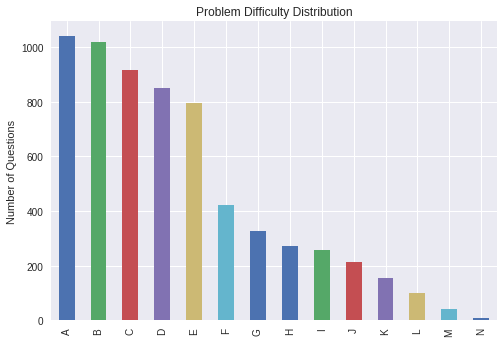

In [18]:
fig = problems_df['level_type'].value_counts().sort_index().plot(kind ='bar', stacked = True, title = "Problem Difficulty Distribution")
fig.set_ylabel('Number of Questions')
plt.show()

####We see that there are more problems which are in the first half of the problem difficulty than the  second half.

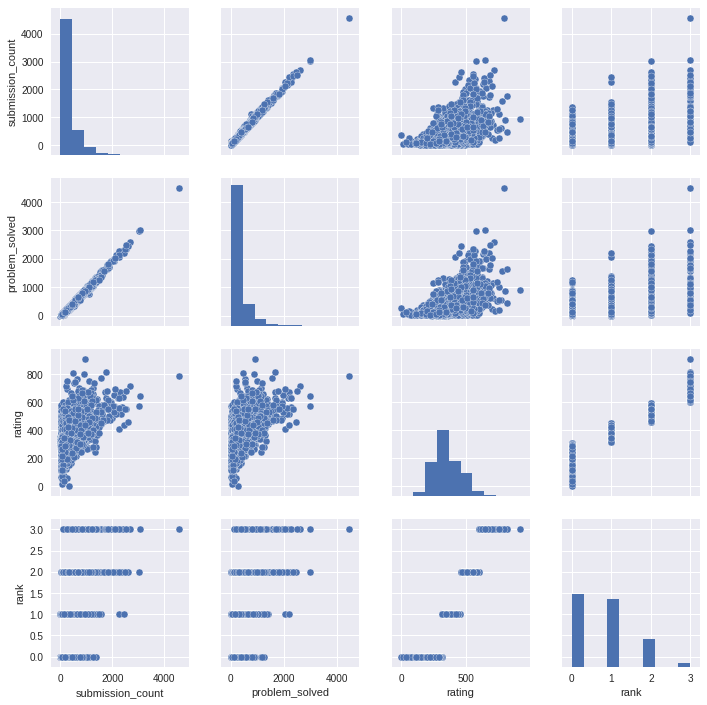

In [19]:
type_level = {'beginner': 0,'intermediate':1,'advanced': 2,'expert':3}
users_df['rank'] =[type_level[type] for type in users_df['rank']]
ax = sns.pairplot(users_df[["submission_count","problem_solved","rating","rank"]])

####So what do the above pair plots tell us?

**1. **Higher number of submissions were made by fewer number of users. 

**2.** Higher count of problems were solved by fewer number of users.

**3.** The rating of users is uniformly spread, and most are with a rating somewhere in the middle.

**4.** Majority users are at an intermediate and beginner level, with very few experts.

**5.** Rating is not directly proportional to the number of problems solved or submissions - this means that difficulty level should have played a part.

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 84)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

ypred_df = pd.DataFrame(y_pred)
ypred_df.index = y_test.index
ypred_df.columns=['1','2','3','4','5','6']

predicted_attempt = ypred_df.idxmax(axis=1)
given_attempt = y_test.idxmax(axis=1)

# Making the Confusion Matrix
print(pd.crosstab(given_attempt, predicted_attempt, rownames=['Actual Attempt Range'], colnames=['Predicted Attempt Range']))

accuracy = accuracy_score(y_test, ypred_df)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

rmse = np.sqrt(mean_squared_error(y_test, ypred_df))
print("RMSE: %f" % (rmse))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Predicted Attempt Range      1     2    3   4   5   6
Actual Attempt Range                                 
1                        17331  3035  243  60  14  28
2                         9429  2164  194  52  17  13
3                         2750   683   56  17   5   6
4                         1104   220   30   7   1   4
5                          506   118   25   4   1   2
6                          577   105   14   4   0   5
Accuracy: 37.29%
RMSE: 0.400145


After applying Random Forest Classifier we get an accuracy of 37.29% and the Root Mean Square Error is 0.400145.

In [21]:
# attempting xgboost algorithm

X_train, X_test, y_train, y_test = train_test_split( X, y_xgb, test_size=0.25, random_state=1)

eval_set = [(X_train,y_train),(X_test,y_test)]
xgb_class = xgb.XGBClassifier(max_depth='10',n_estimators=100, gamma=0, objective='multi:softmax')
xgb_class.fit(X_train,y_train,eval_set=eval_set,verbose=1,eval_metric=['mlogloss'])
print(xgb_class)

preds = xgb_class.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(given_attempt, preds, rownames=['Actual Attempt Range'], colnames=['Predicted Attempt Range']))

y1 = pd.get_dummies(y_test)
y2 = pd.get_dummies(preds)

accuracy = accuracy_score(y1, y2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

rmse = np.sqrt(mean_squared_error(y1, y2))
print("RMSE: %f" % (rmse))

[0]	validation_0-mlogloss:1.70076	validation_1-mlogloss:1.70543
[1]	validation_0-mlogloss:1.62576	validation_1-mlogloss:1.63449
[2]	validation_0-mlogloss:1.56234	validation_1-mlogloss:1.57497
[3]	validation_0-mlogloss:1.508	validation_1-mlogloss:1.52445
[4]	validation_0-mlogloss:1.46027	validation_1-mlogloss:1.48043
[5]	validation_0-mlogloss:1.41855	validation_1-mlogloss:1.44246
[6]	validation_0-mlogloss:1.38126	validation_1-mlogloss:1.40855
[7]	validation_0-mlogloss:1.34854	validation_1-mlogloss:1.37902
[8]	validation_0-mlogloss:1.31892	validation_1-mlogloss:1.35301
[9]	validation_0-mlogloss:1.29242	validation_1-mlogloss:1.32992
[10]	validation_0-mlogloss:1.26821	validation_1-mlogloss:1.30892
[11]	validation_0-mlogloss:1.24643	validation_1-mlogloss:1.29036
[12]	validation_0-mlogloss:1.22654	validation_1-mlogloss:1.27345
[13]	validation_0-mlogloss:1.20845	validation_1-mlogloss:1.2585
[14]	validation_0-mlogloss:1.19197	validation_1-mlogloss:1.24502
[15]	validation_0-mlogloss:1.1768	vali

After applying XgBoost Algorithm we get an accuracy of 54.72% and the Root Mean Square Error is 0.3884. The xgboost algorithm has  given a substantially improved model. We can tune the parameteres and improve the accuracy but we will hold on with XGBoost for now.